In [161]:
!pip install pandas numpy matplotlib seaborn


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# Load data
file_path = "/content/Bookingsdata.csv"
df = pd.read_csv(file_path)


In [164]:
# Display basic dataset info
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()
print("Summary Statistics:")
print(df.describe())

Dataset Shape: (103024, 20)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63

In [165]:
print(df.columns)

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')


In [166]:
# Remove columns with all zero values
zero_cols = df.columns[df.eq(0).all()]
df = df.drop(zero_cols, axis=1)
df.columns


Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

<ipython-input-167-8f23345eb62a>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


datetime64[ns]


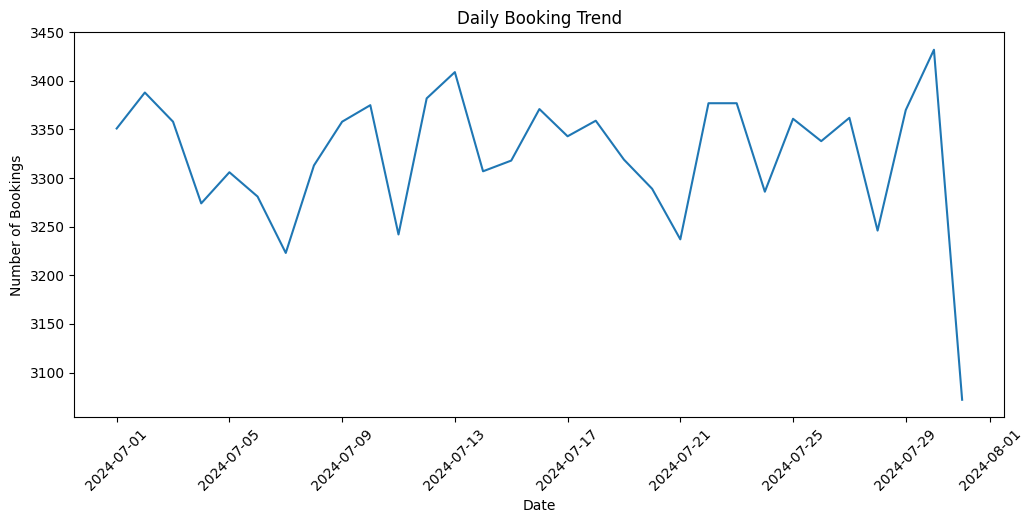

In [167]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df['Date'].dtype)  # Check if the conversion was successful


#  Trend Over Time (Daily Bookings)
plt.figure(figsize=(12, 5))
df.groupby(df['Date'].dt.date).size().plot()
plt.title("Daily Booking Trend")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


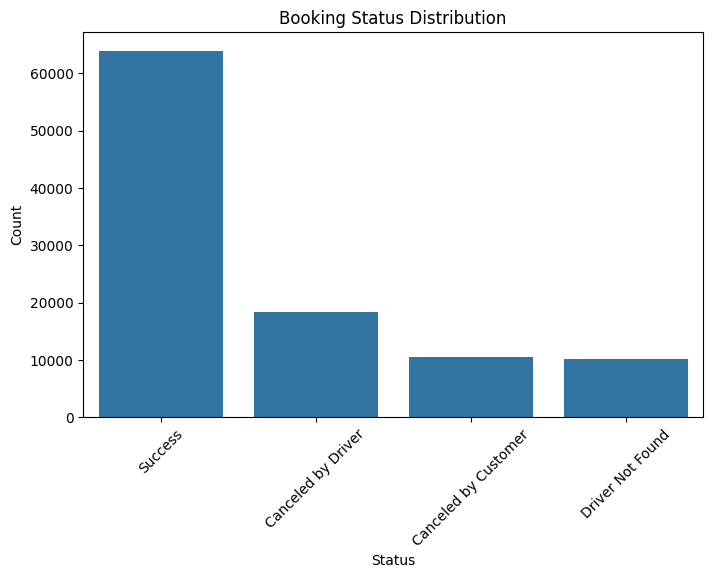

In [168]:
#  Booking Status Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='Booking_Status', data=df, order=df['Booking_Status'].value_counts().index)
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

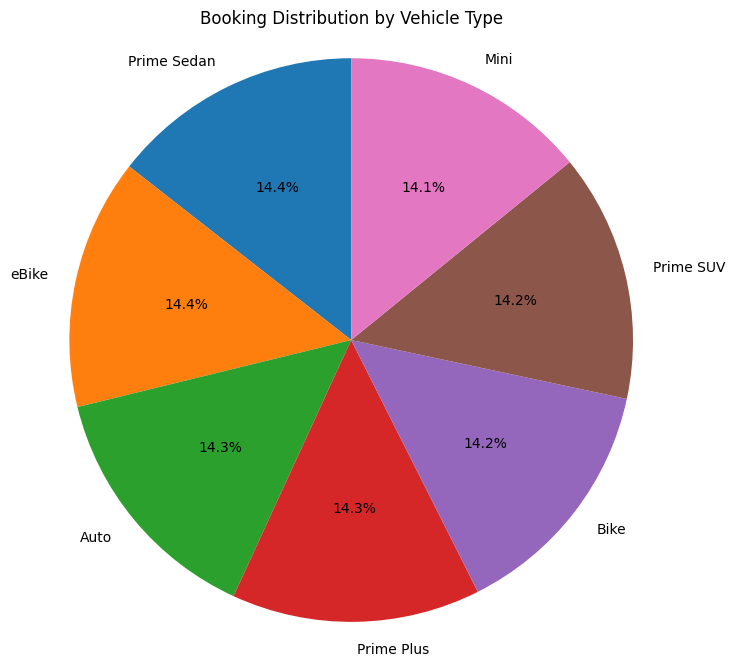

In [169]:
# Visualization: Booking Distribution Vehiclewise (Pie Chart)
vehicle_counts = df['Vehicle_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking Distribution by Vehicle Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Average Customer and Driver Ratings by Vehicle Type:
              Customer_Rating  Driver_Ratings
Vehicle_Type                                 
Auto                 3.998811        4.003938
Bike                 3.993376        3.984651
Mini                 3.997731        3.992807
Prime Plus           4.009499        3.997785
Prime SUV            3.999378        4.005780
Prime Sedan          4.001589        3.990681
eBike                3.987854        4.006743


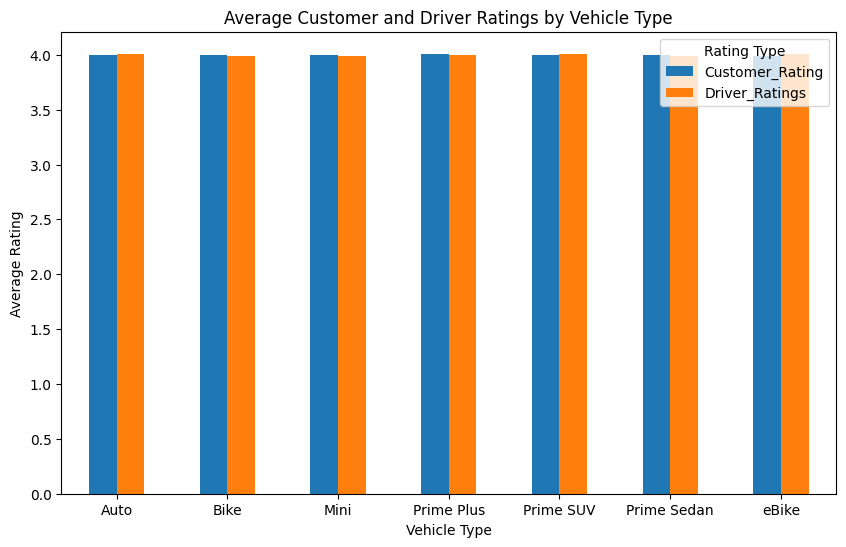

In [170]:
# Calculate average customer and driver ratings by vehicle type
average_ratings = df.groupby('Vehicle_Type').agg({'Customer_Rating': 'mean', 'Driver_Ratings': 'mean'})

print("\nAverage Customer and Driver Ratings by Vehicle Type:")
print(average_ratings)

# Visualization: Average Ratings by Vehicle Type
average_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Average Customer and Driver Ratings by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.legend(title='Rating Type')
plt.show()


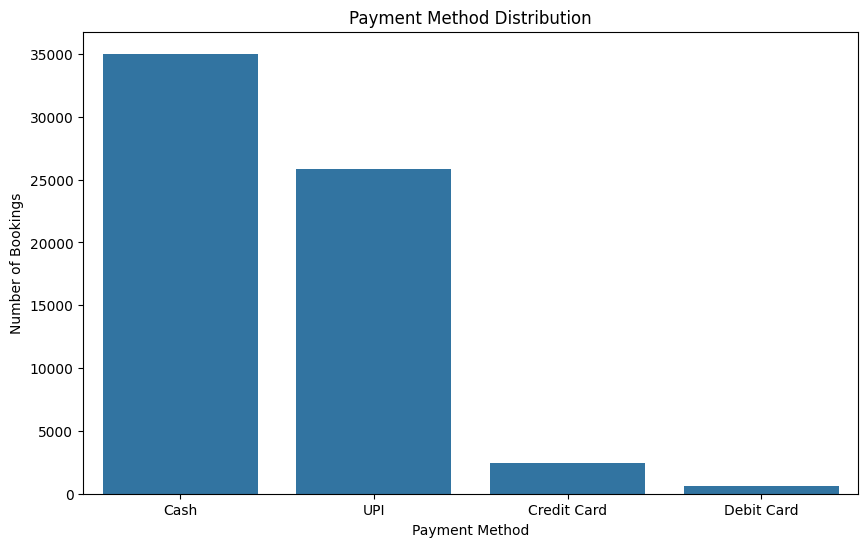

In [171]:
# Assuming 'df' is your DataFrame and 'Payment_Method' column exists
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', data=df)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Bookings')
plt.show()

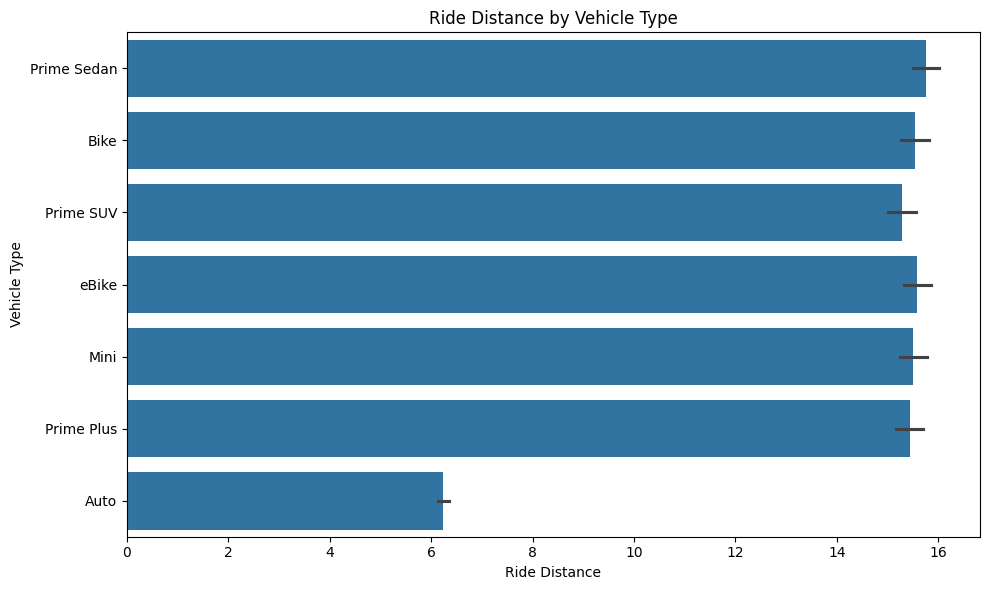

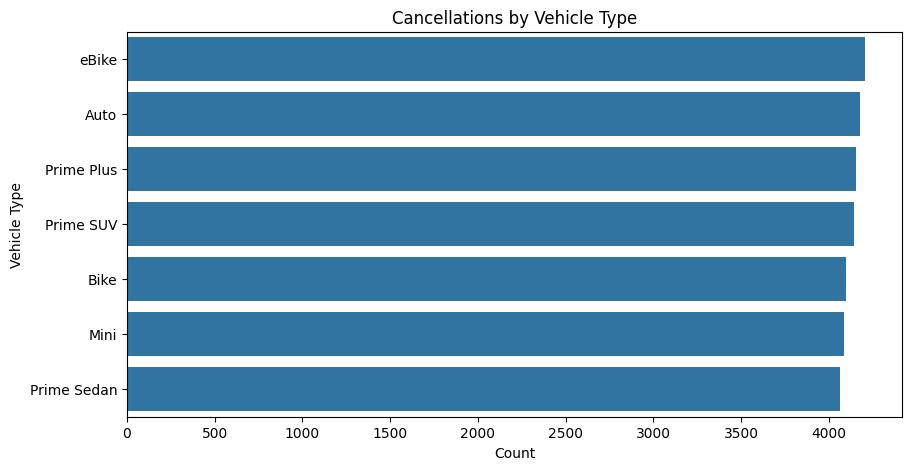

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Vehicle_Type', x='Ride_Distance', data=df) # ci=None removes confidence intervals
plt.title('Ride Distance by Vehicle Type')
plt.ylabel('Vehicle Type')
plt.xlabel('Ride Distance')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#  Cancellations by Vehicle Type
plt.figure(figsize=(10, 5))
cancel_data = df[df['Booking_Status'].str.contains("Cancel", na=False)]
sns.countplot(y='Vehicle_Type', data=cancel_data, order=cancel_data['Vehicle_Type'].value_counts().index)
plt.title("Cancellations by Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.show()


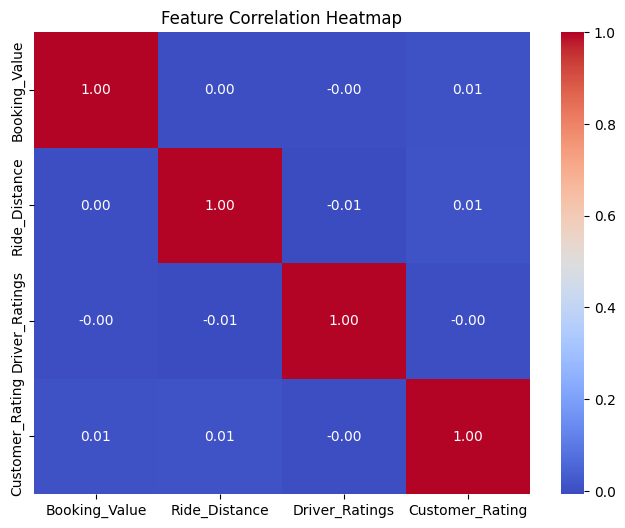

In [173]:
#  Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()